## Implementing Gradient Descent from Scratch 

### Step 0: Import libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from IPython.display import HTML
import imageio
import time
import warnings

# turn off RuntimeWarning 
warnings.simplefilter("ignore", category=RuntimeWarning)

### Step 1. Create data
Create a continuous set of X data  
Following fuction uses list comprehension to create 2000 random datapoints that are between 0.01 and 0.99

In [2]:
Xtrue = [randint(1,100) * 0.01 for x in range(2000)]

Create y data on the back of the data with noise   
### Linear function: $f(x) = a + bx$

Text(0.5,1,'Random data')

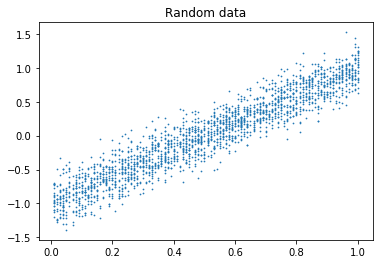

In [3]:
SLOPE = 2.0
INTERCEPT = -1.0
NOISE = 0.2
ytrue = [SLOPE * x + INTERCEPT + np.random.normal(0, NOISE) for x in Xtrue] # np.random.normal skews our data 

plt.scatter(Xtrue, ytrue, s=0.5)
plt.title('Random data')

### Step 2: Generate a line
Generate a random line of fit for baseline to improve it later with the gradient descent

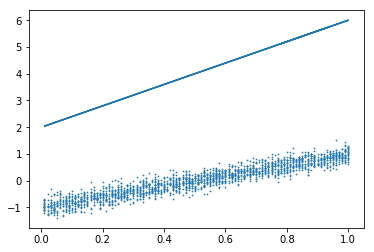

In [4]:
def make_line(x_data, slope, intercept):
    return [slope * x + intercept for x in x_data]
ypred = make_line(Xtrue, 4, 2)

plt.scatter(Xtrue, ytrue, s=0.5)
plt.plot(Xtrue, ypred)

### Step 3: Loss function
Calculate the loss function for the linear regression  
Loss function: Mean Sqared Error (MSE)

### MSE = $\frac{1}{n}\sum_{t=1}^{n}(y-\hat{y})^2$  

In [5]:
def mse(ytrue, ypred):
    return sum([(yt-yp)**2 for yt, yp in zip(ytrue, ypred) ]) / len(ytrue)

In [6]:
score = mse(ytrue, ypred)
print(f'Slope of the MSE curve: {score}')

Slope of the MSE curve: 16.550256941414123


### Step 4: Gradient
Now we calculate the gradient for the loss function curve

In [7]:
def gradient_of_loss_function(Xtrue, ytrue, slope, intercept):
    
    step_size = 0.001
    
    # we want to make an initial linear regression line, to improve it later 
    first_line = make_line(Xtrue, slope, intercept)
    
    # tweak the slope
    new_slope = slope + step_size
    new_slope_line = make_line(Xtrue, new_slope, intercept)
    
    # tweak the intercept
    new_intercept = intercept + step_size
    new_intercept_line = make_line(Xtrue, slope, new_intercept)
    
    # calculate the gradient for those tweaks (change in y over the change in x).
    new_slope_gradient = ((mse(ytrue, new_slope_line) - mse(ytrue, first_line)) / step_size)
                          
    new_intercept_gradient = ((mse(ytrue, new_intercept_line) - mse(ytrue, first_line)) / step_size)    
    
    # return the gradient
    return new_slope_gradient, new_intercept_gradient
    
# this function only tweaks one variable at a time

In [8]:
gradient_of_loss_function(Xtrue, ytrue, -4, 3) 
# these are the gradients of the new line

(0.0047361425732361795, 1.8881909773469374)

### Step 5: Loop the process
Now we can loop though a process of finding the lowest function score possible

In [17]:
%matplotlib
# Turn off interactive matplotlib 
plt.ioff()

Using matplotlib backend: TkAgg


In [18]:
# Add random starting parameters
SLOPE = -5.5
INTERCEPT = -3.0
LEARNING_RATE = 0.08

for i in range(500):
    time.sleep(0.01)

    # Get the gradients
    slope_gradient, intercept_gradient = gradient_of_loss_function(Xtrue, ytrue, SLOPE, INTERCEPT)

    # Update our slope and intercept based on them
    SLOPE_NEW = SLOPE - slope_gradient * LEARNING_RATE
    INTERCEPT_NEW = INTERCEPT - intercept_gradient * LEARNING_RATE

    # Reset our slope and intercept
    SLOPE = SLOPE_NEW
    INTERCEPT = INTERCEPT_NEW

    # Prints only every 10th interation
    if i % 10 == 0:
        plt.scatter(Xtrue, ytrue, s=0.5)
        plt.plot(Xtrue, make_line(Xtrue, SLOPE, INTERCEPT))
        plt.title(f'gradient_descent_at_step_{i}')
        plt.savefig(f'plots/step_{i}.png')
        plt.figure()
        print(f'The updated slope is : {SLOPE :8.3}')

The updated slope is :    -4.93
The updated slope is :    -2.64
The updated slope is :    -2.03
The updated slope is :    -1.63
The updated slope is :    -1.28
The updated slope is :   -0.968
The updated slope is :   -0.685
The updated slope is :    -0.43
The updated slope is :   -0.199
The updated slope is :   0.0103
The updated slope is :    0.199
The updated slope is :     0.37
The updated slope is :    0.524
The updated slope is :    0.664
The updated slope is :     0.79
The updated slope is :    0.904
The updated slope is :     1.01
The updated slope is :      1.1
The updated slope is :     1.18
The updated slope is :     1.26
The updated slope is :     1.33
The updated slope is :     1.39
The updated slope is :     1.45
The updated slope is :      1.5
The updated slope is :     1.54
The updated slope is :     1.59
The updated slope is :     1.62
The updated slope is :     1.66
The updated slope is :     1.69
The updated slope is :     1.72
The updated slope is :     1.74
The upda

### Step 6: Create gif
And visualise our results using imagio

In [24]:
def create_gif():
    images = []
    for i in range(500):
        if i % 10 == 0:
            filename = f'plots/step_{i}.png'
            image = imageio.imread(filename)
            images.append(image)

    imageio.mimsave('linear_gradient.gif', images, fps=15)
    return imageio.mimsave('linear_gradient.gif', images, fps=15)
create_gif()

### We can see that the slope converges to 2 (the true slope of our data) 
The goal is to get to what we assigned the slope in the beginning (We assigned 2.0)  
With Linear regressions the number of iterations should be between 10 - 100  
If we have scaled data we will reach the optimal point faster  

In [25]:
HTML('<img src="linear_gradient.gif">')